# CONSTRUÇÃO DE CAMPOS SPECKLES

Primeiramente faremos novamente algumas pré-definições para a execução das células posteriores de código.

In [1]:
%cd -q ../../
from optical import beam
# módulo numpy: utilizado na computação de matrizes
import numpy as np
# módulo plotly: utilizado na construção de gráficos
from plotly import graph_objects as go

# construção da região simulada do plano transverso
x = np.linspace(-40.0, +40.0, 500); # 500 pontos entre -40 e +40
y = np.linspace(-40.0, +40.0, 500); # 500 pontos entre -40 e +40

X, Y = np.meshgrid(x, y);           # malha de pontos do plano transverso

# configuração dos gráficos
layout = lambda titulo: go.Layout(
    title = titulo,
    title_x = 0.5,                  # centraliza o título
    xaxis = dict(title = 'x(μm)'),
    yaxis = dict(title = 'y(μm)'),
    width = 900,
    height = 850
);

cmap = {
    'intensidade': 'inferno',
    'fase': 'greys'
};

## Criação de campos com fase flutuante

Um speckle consiste no fenômeno óptico de aparência granular decorrente da interferência da luz com fases flutuantes, assim primeiramente computaremos um campo de fase aleatória.

In [2]:
# cria uma matriz aleatória do tamanho da malha no plano transverso
fase_r = 2.0 * np.pi * np.random.rand(len(x), len(y));

G__fasor_r = beam.create_G(
    w0 = 10.0,
    region = (X, Y),
    beam_phase = fase_r
);

### Perfil transversal do feixe de fase aleatória

#### Intensidade do feixe

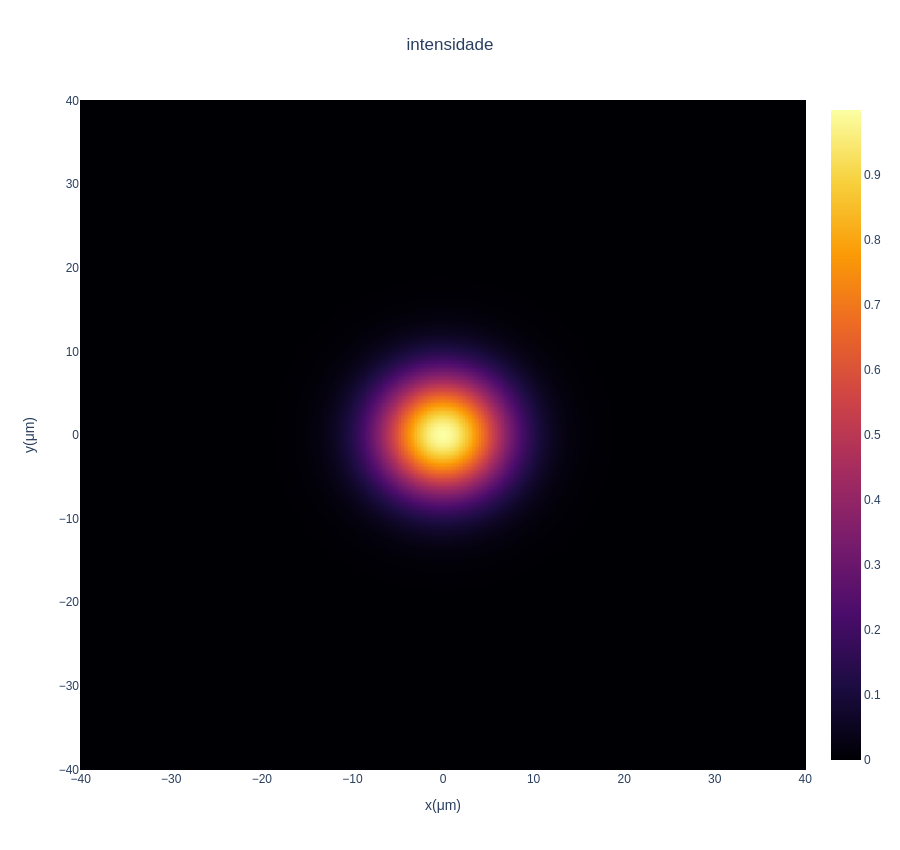

In [3]:
grafico_da_intensidade = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.abs(G__fasor_r) ** 2,
        colorscale = cmap['intensidade']
    ),
    layout = layout('intensidade')
);

grafico_da_intensidade.show("png");

#### Fase do feixe

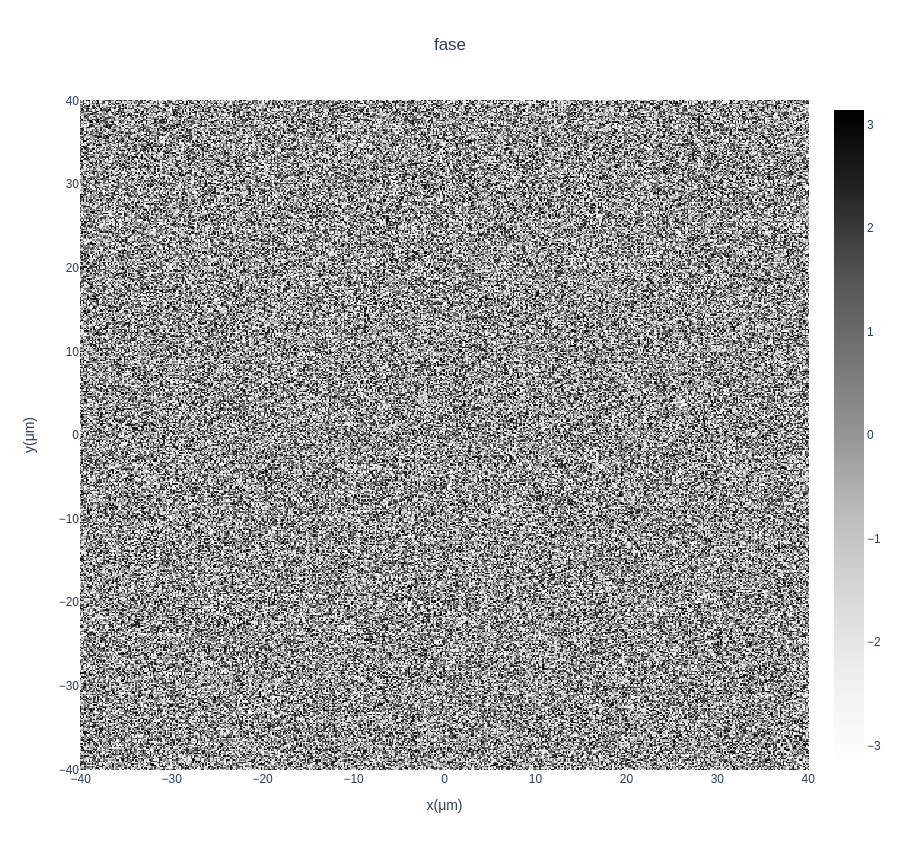

In [4]:
grafico_da_fase = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.angle(G__fasor_r),
        colorscale = cmap['fase']
    ),
    layout = layout('fase')
);

grafico_da_fase.show("png");

### Perfil transversal do feixe speckle

O speckle consiste na propagação através de uma lente (via transformada de Fourier) do campo com fase aleatória.

In [5]:
# importa a transformada de fourier
from scipy.fftpack import fft2, fftshift

speckle = beam.normalize(fftshift(fft2(G__fasor_r)));

#### Intensidade do feixe

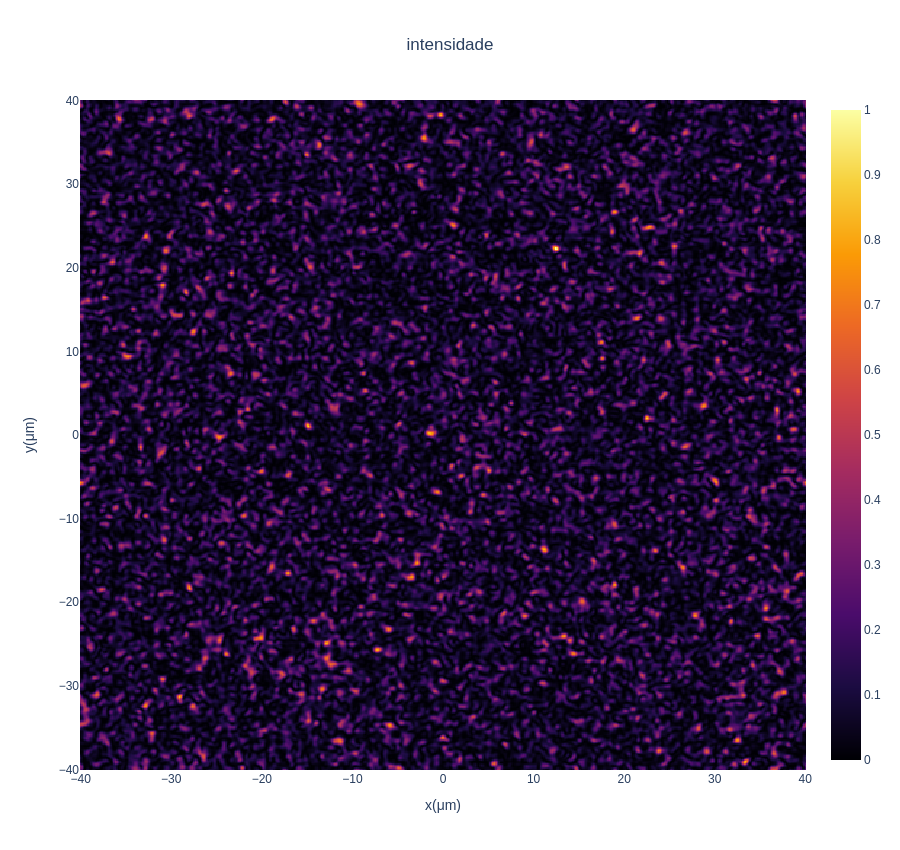

In [6]:
grafico_da_intensidade = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.abs(speckle) ** 2,
        colorscale = cmap['intensidade']
    ),
    layout = layout('intensidade')
);

grafico_da_intensidade.show("png");

#### Fase do feixe

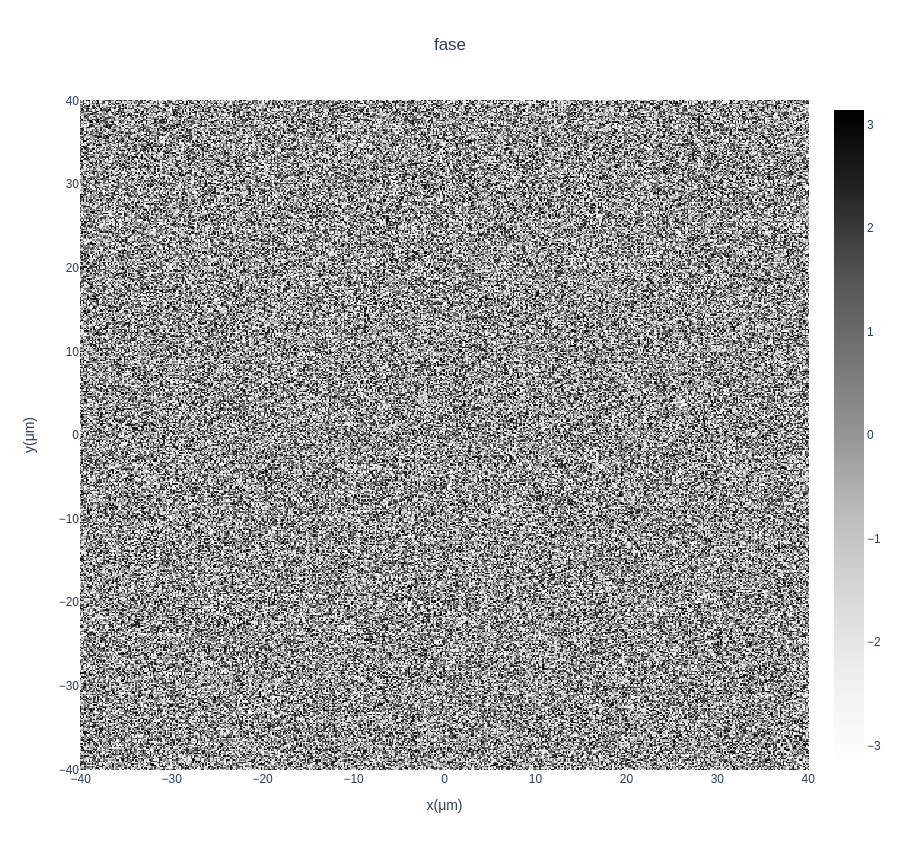

In [7]:
grafico_da_fase = go.Figure(
    go.Heatmap(
        x = x, y = y, z = np.angle(G__fasor_r),
        colorscale = cmap['fase']
    ),
    layout = layout('fase')
);

grafico_da_fase.show("png");